In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance_matrix
import pandas as pd

In [7]:
def k_means(X, K) :
    nrow = X.shape[0]
    ncol = X.shape[1]
    
    initial_centroids = np.random.choice(nrow, K, replace = False)
    centroids = X[initial_centroids]
    
    centroids_old = np.zeros((K, ncol))
    cluster_assignments = np.zeros(nrow)
    
    while (centroids_old != centroids).any() :
        centroids_old = centroids.copy();
        dist_mat = distance_matrix(X, centroids, p = 2)
        
        for i in np.arange(nrow) :
            d = dist_mat[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]
            cluster_assignments[i] = closest_centroid
            
        for k in np.arange(K) :
            Xk = X[cluster_assignments == k]
            centroids[k] = np.apply_along_axis(np.mean, axis = 0, arr = Xk)
    
    return (centroids, cluster_assignments)


In [8]:

def predict(X, centroids) :
    nrow = X.shape[0]
    cluster_assignments = np.zeros(nrow)
    dist_mat = distance_matrix(X, centroids)
    for i in np.arange(nrow) :
        d = dist_mat[i]
        closest_centroid = (np.where(d == np.min(d)))[0][0]
        cluster_assignments[i] = closest_centroid
        
    return cluster_assignments

In [9]:
df = pd.read_csv('F:\stark\Iris.csv')

X = np.column_stack((df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm']))

K = 3
k_means_result = k_means(X, K)

centroids = k_means_result[0]
cluster_assignments = k_means_result[1]


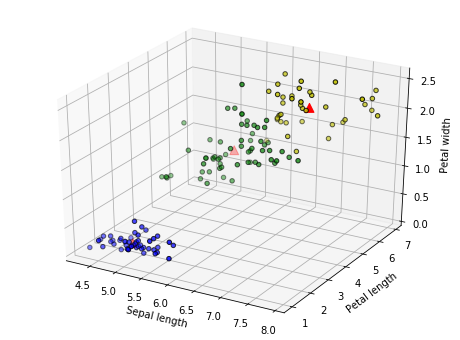

In [10]:
colors = ['y', 'g', 'b']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

fig = plt.figure("KMeans", figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], color = cluster_assignments, edgecolor = 'k')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c = 'r', marker = '^', s = 80)

plt.show()

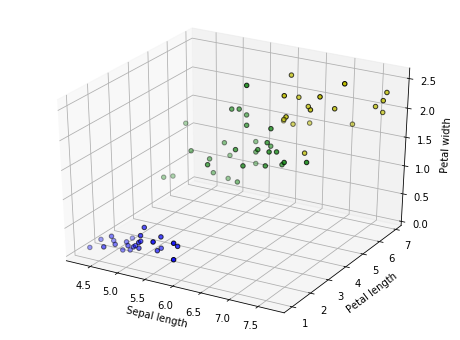

In [11]:
rows = list(range(25, 50))
df = df.drop(df.index[rows])
rows = list(range(50, 75))
df = df.drop(df.index[rows])
rows = list(range(75, 100))
df = df.drop(df.index[rows])

X = np.column_stack((df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm']))
cluster_assignments = predict(X, centroids)

colors = ['y', 'g', 'b']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

fig = plt.figure("KMeans", figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], color = cluster_assignments, edgecolor = 'k')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

plt.show()